In [6]:

pip install tensorflow

In [7]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()


categories = ['red', 'blue', 'green', 'blue', 'red', 'green','yellow']
me=le.fit(categories)
encoded_labels = le.transform(categories)

In [8]:
print(encoded_labels)


[2 0 1 0 2 1 3]


In [17]:
One Hot Encoding

SyntaxError: invalid syntax (799063020.py, line 1)

In [34]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Create a 1D array of categorical data
categories = np.array(['red', 'blue', 'green', 'blue', 'red', 'green','yellow','BHai','MeowMeow','red'])


categories_2d = categories.reshape(-1, 1)


encoder = OneHotEncoder()


encoded_data = encoder.fit_transform(categories_2d)


encoded_array = encoded_data.toarray()


print(encoded_array)



[[0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [35]:
one_hot_encoded=tf.one_hot(indices=encoded_labels, depth=len(np.unique(encoded_labels)))

In [23]:
meow

NameError: name 'meow' is not defined

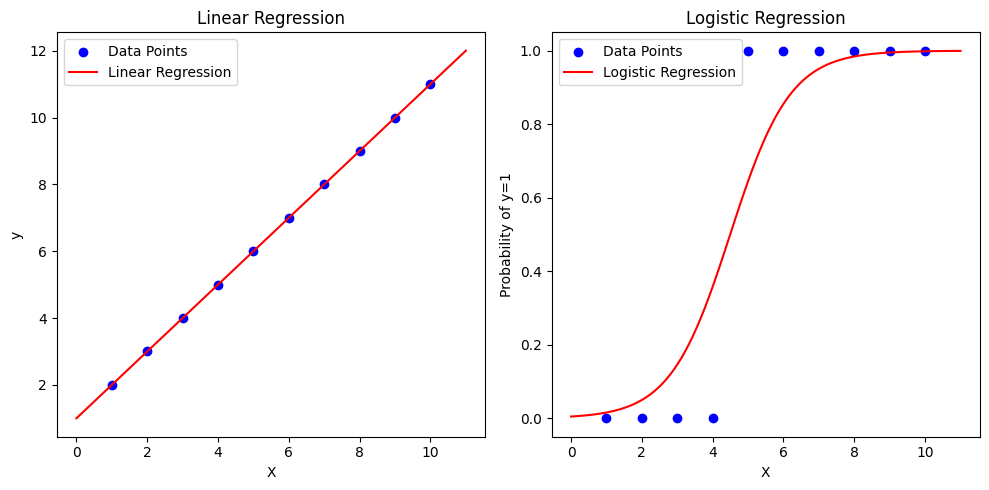

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

# Sample data for linear regression
X_linear = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y_linear = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

# Sample data for logistic regression
X_logistic = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y_logistic = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# Fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_linear, y_linear)

# Fit the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_logistic, y_logistic)

# Generate points for the regression lines
X_range = np.linspace(0, 11, 100).reshape(-1, 1)

# Predictions using the models
y_linear_pred = linear_model.predict(X_range)
y_logistic_pred = logistic_model.predict_proba(X_range)[:, 1]

# Plot the data points and regression lines
plt.figure(figsize=(10, 5))

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(X_linear, y_linear, color='blue', label='Data Points')
plt.plot(X_range, y_linear_pred, color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()

# Logistic Regression Plot
plt.subplot(1, 2, 2)
plt.scatter(X_logistic, y_logistic, color='blue', label='Data Points')
plt.plot(X_range, y_logistic_pred, color='red', label='Logistic Regression')
plt.xlabel('X')
plt.ylabel('Probability of y=1')
plt.title('Logistic Regression')
plt.legend()

plt.tight_layout()
plt.show()


Accuracy: 0.7666666666666667
Confusion Matrix:
[[10  0  0]
 [ 0  6  3]
 [ 0  4  7]]


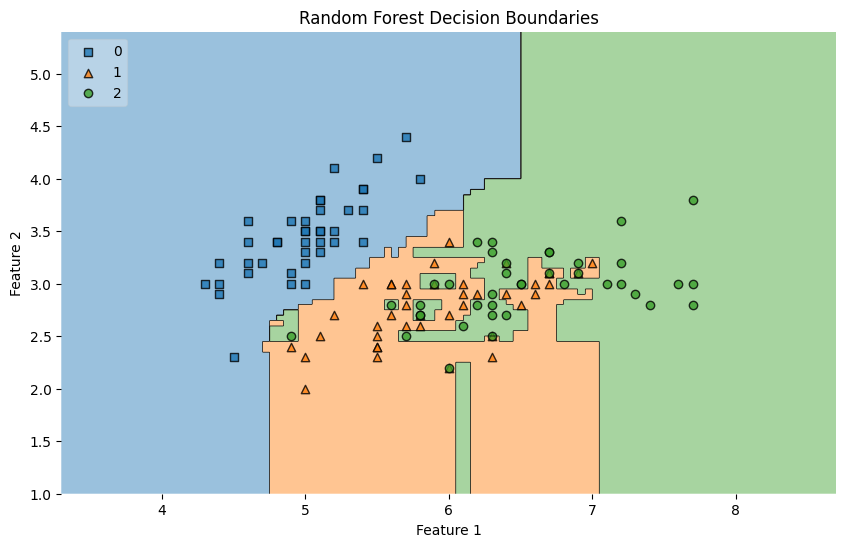

TypeError: only integer scalar arrays can be converted to a scalar index

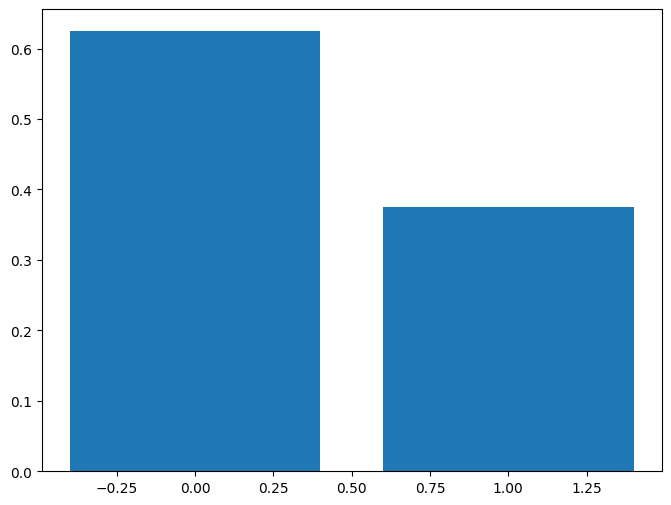

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions

# Load the Iris dataset
iris = load_iris()
X, y = iris.data[:, :2], iris.target  # Use only the first two features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize decision boundaries
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train, y_train, clf=rf_classifier, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Forest Decision Boundaries')
plt.show()

# Visualize feature importances
feature_importances = rf_classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(8, 6))
plt.bar(range(X.shape[1]), feature_importances[indices])
plt.xticks(range(X.shape[1]), iris.feature_names[:2][indices], rotation=45)  # Display names of the first two features
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()



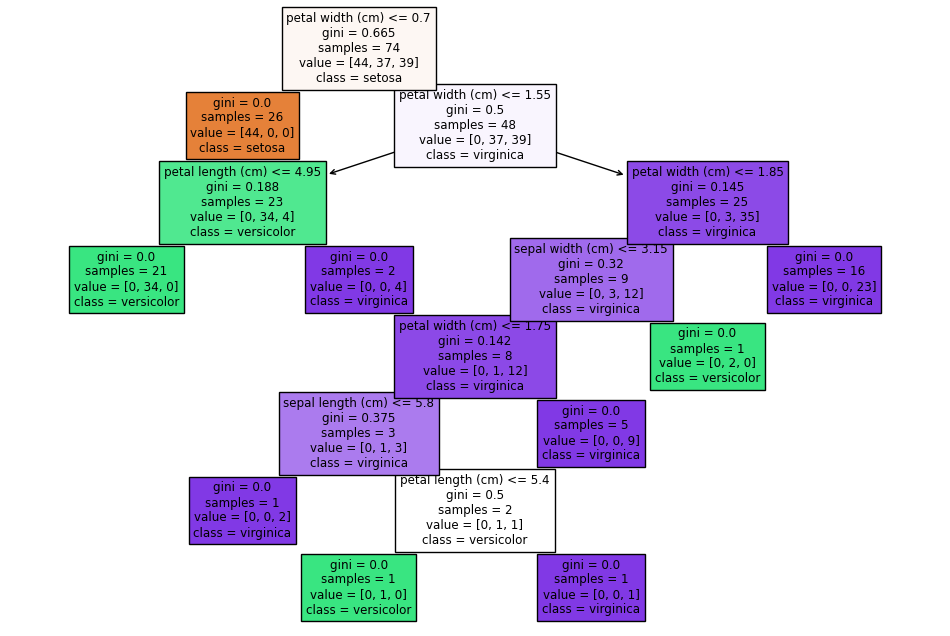

In [37]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier with a small number of trees for visualization purposes
rf_classifier = RandomForestClassifier(n_estimators=5, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Visualize the first decision tree in the Random Forest
plt.figure(figsize=(12, 8))
plot_tree(rf_classifier.estimators_[0], feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


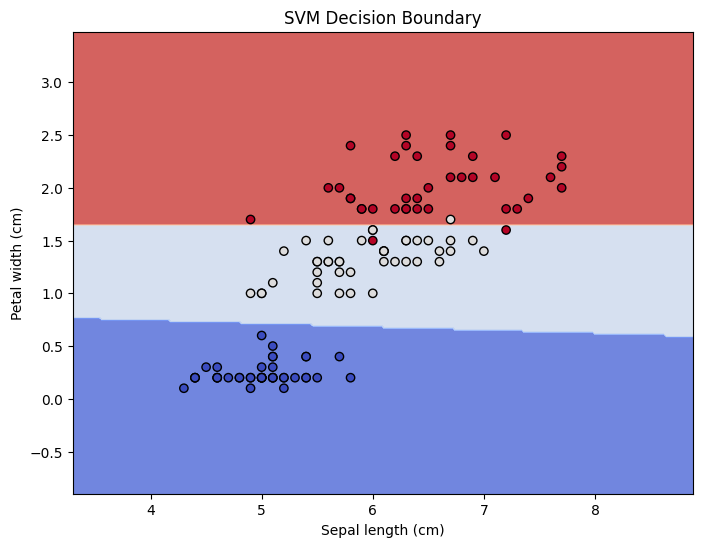

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, [0, 3]]  # Select two features: sepal length and petal width
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the SVM model
model = SVC(kernel='linear')

# Train the model
model.fit(X_train, y_train)

# Create a meshgrid to plot the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each meshgrid point
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the result to match the meshgrid dimensions
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('SVM Decision Boundary')
plt.show()


In [38]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce GTX 1650 (UUID: GPU-c50cc9e0-2b3e-a0b9-2406-f9b299165633)


In [39]:
import tensorflow as tf
scalar=tf.constant([[1,2,3],[1,2,3]])
scalar

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [1, 2, 3]])>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [2]:
print(tf.version)

<module 'tensorflow._api.v2.version' from 'C:\\Users\\Dhrimanti\\AppData\\Roaming\\Python\\Python310\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>
